In [1]:
from PyPESTO.FRP import create_FRP2_v2
%load_ext autoreload
%autoreload 2

The tests rely on tellurium to construct the models
Since tellurium is not installed the tests can't be run
If you want to run the tests, pip install tellurium first


In [2]:
# sbml_model_filepath = '/SBML/PyPESTO/FRP/sbml_model.xml'
amici_model, sbml_model_filepath = create_FRP2_v2.load_amici_from_sbml()

Creating SBML model (FRP2 v2)
Creating species.
Generating parameters.
Creating reactions
Importing AMICI model from SBML


In [3]:
kpAA_true = create_FRP2_v2.kpAA_true = 2.0
kpAB_true = create_FRP2_v2.kpAB_true = 0.1
kpBA_true = create_FRP2_v2.kpBA_true = 10.0
kpBB_true = create_FRP2_v2.kpBB_true = 5.0
kdAA_true = create_FRP2_v2.kdAA_true = 0.5

rA_true = create_FRP2_v2.rA_true = create_FRP2_v2.kpAA_true / create_FRP2_v2.kpAB_true
rB_true = create_FRP2_v2.rB_true = create_FRP2_v2.kpBB_true / create_FRP2_v2.kpBA_true
rX_true = create_FRP2_v2.rX_true = create_FRP2_v2.kpAA_true / create_FRP2_v2.kpBB_true
KAA_true = create_FRP2_v2.KAA_true = create_FRP2_v2.kpAA_true / create_FRP2_v2.kdAA_true

yaml_filepath = create_FRP2_v2.write_petab_files(amici_model, sbml_model_filepath)

/SBML/PyPESTO/FRP/create_FRP2_v2.py:167: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  measurement_df = pd.concat([measurement_df, df_a, df_b], ignore_index=True)
/SBML/PyPESTO/FRP/create_FRP2_v2.py:176: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conditions_df = pd.concat([conditions_df, conditions_data], ignore_index=True)
/tmp/ipykernel_71019/1899409115.py:12: DeprecationWarning: Accessing `petab.yaml` is deprecated and will be removed in the next major release. Please use `petab.v1.yaml` i

(2.0, 20.0, 0.5, 0.4, 4.0)
(2.0, 20.0, 0.5, 0.4, 4.0)
(2.0, 20.0, 0.5, 0.4, 4.0)


In [4]:
import logging

import numpy as np
import petab
import amici
import amici.plotting
import sys
import os
import importlib

import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize

# log diagnostics
logger = logging.getLogger("pypesto.sample.diagnostics")
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

# import to petab
petab_problem = petab.Problem.from_yaml(
    yaml_filepath
)
# importer = pypesto.petab.PetabImporter(petab_problem, model_name=create_FRP_v1.MODEL_NAME)

importer = pypesto.petab.PetabImporter.from_yaml(
    yaml_filepath,
    model_name=create_FRP2_v2.MODEL_NAME,
)

# Works when it runs twice for some reason
try:
    problem = importer.create_problem(force_compile=True)
except:
    problem = importer.create_problem(force_compile=True)

Visualization table not available. Skipping.
Compiling amici model to folder /SBML/amici_models/0.26.1/tmpq4u6evqi.
2024-08-22 12:12:35.121 - amici.petab.sbml_import - INFO - Importing model ...
2024-08-22 12:12:35.122 - amici.petab.sbml_import - INFO - Validating PEtab problem ...
Visualization table not available. Skipping.
2024-08-22 12:12:35.135 - amici.petab.sbml_import - INFO - Model name is 'tmpq4u6evqi'.
Writing model code to '/SBML/amici_models/0.26.1/tmpq4u6evqi'.
2024-08-22 12:12:35.136 - amici.petab.sbml_import - INFO - Species: 12
2024-08-22 12:12:35.137 - amici.petab.sbml_import - INFO - Global parameters: 15
2024-08-22 12:12:35.138 - amici.petab.sbml_import - INFO - Reactions: 17
2024-08-22 12:12:35.161 - amici.petab.sbml_import - INFO - Observables: 2
2024-08-22 12:12:35.162 - amici.petab.sbml_import - INFO - Sigmas: 2
2024-08-22 12:12:35.164 - amici.petab.sbml_import - DEBUG - Adding output parameters to model: []
2024-08-22 12:12:35.166 - amici.petab.sbml_import - DEB

running build_ext
------------------------------ model_ext ------------------------------
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Performing Test CUR_FLAG_SUPPORTED
-- Performing Test CUR_FLAG_SUPPORTED - Success
-- Appending flags from AMICI_CXXFLAGS: -fopenmp
-- Appending

In [5]:
importer.output_folder

'/SBML/amici_models/0.26.1/tmpq4u6evqi'

In [6]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), n_chains=3,
)

Initializing betas with "near-exponential decay".


In [7]:
%%capture
n_samples = 50_000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    # x0=np.array([1.5, -0.75,-1., 0.75]),
    # x0=np.array([1, 1, 1, 1]),
    x0=np.array([
        np.log(1/rA_true), 
        np.log(1/rB_true), 
        np.log(1/rX_true), 
        np.log(1/kpAA_true),
        np.log(1/KAA_true),
    ]),
    filename=None,
)
elapsed_time = result.sample_result.time
print(f"Elapsed time: {round(elapsed_time,2)}")

Elapsed time: 406.55402059100004


/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


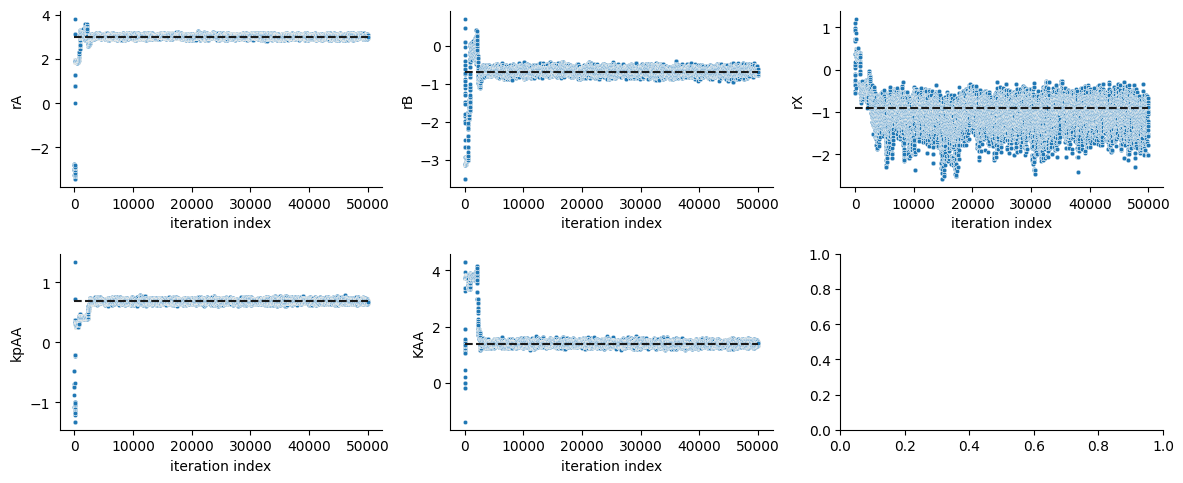

In [8]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5)
)

ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([KAA_true, KAA_true]), "k--")


Geweke burn-in index: 2500
Geweke burn-in index: 2500


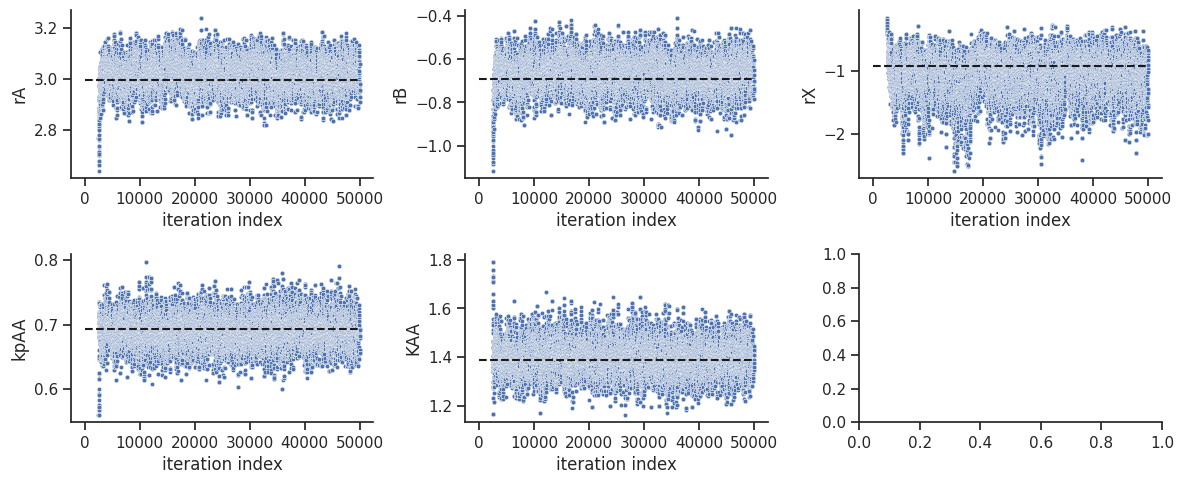

In [9]:
sample.geweke_test(result=result)
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5)
)
ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([KAA_true, KAA_true]), "k--")

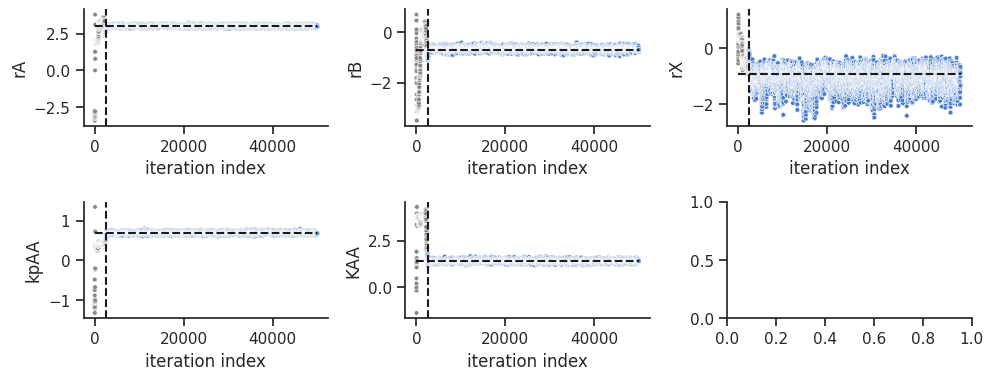

In [10]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, full_trace=True, size=(10, 4)
)
ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([KAA_true, KAA_true]), "k--")

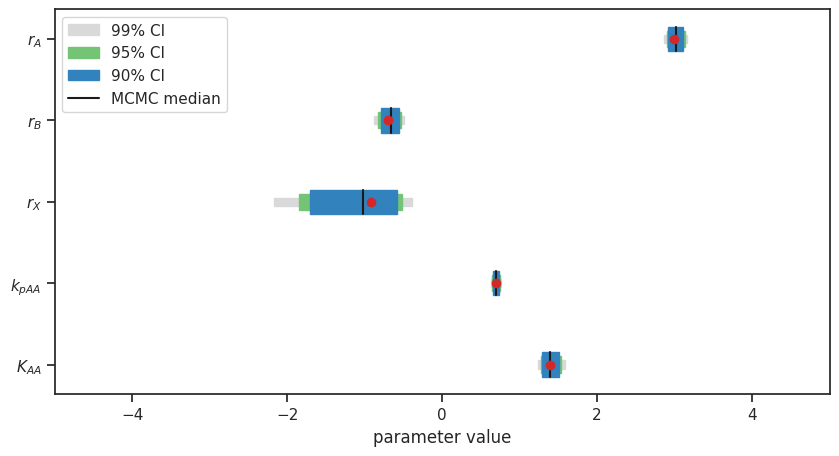

In [11]:
alpha = [99, 95, 90]
import matplotlib.pyplot as plt
ax = visualize.sampling_parameter_cis(result, alpha=alpha, size=(10, 5))
line1, = ax.plot([np.log(rA_true)], 0, 'o', color='tab:red')
line2, = ax.plot([np.log(rB_true)], 1, 'o', color='tab:red')
line3, = ax.plot([np.log(rX_true)], 2, 'o', color='tab:red')
line4, = ax.plot([np.log(kpAA_true)], 3, 'o', color='tab:red')
line5, = ax.plot([np.log(KAA_true)], 4, 'o', color='tab:red')

# ax.legend()
# Get existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

unique_handles_labels = list(dict(zip(labels, handles)).items())
unique_labels, unique_handles = zip(*unique_handles_labels)

# Update the legend with unique handles and labels
ax.legend(unique_handles, unique_labels)
ax.set_yticks([0,1,2,3,4],['$r_{A}$', '$r_{B}$', '$r_{X}$', '$k_{pAA}$', '$K_{AA}$'])
ax.set_xlabel('parameter value')
ax.set_ylabel('')
ax.set_xlim(-5, 5)
plt.show()
# ax.vlines(np.log([k1_true, k2_true]), 0, 1, color="k", linestyle="--")

In [12]:
np.exp(sample.calculate_ci_mcmc_sample(result, ci_level=0.6827))

array([[19.23737226,  0.47667908,  0.2423052 ,  1.95011229,  3.78450002],
       [21.74439576,  0.55159722,  0.47730935,  2.0431653 ,  4.3267195 ]])

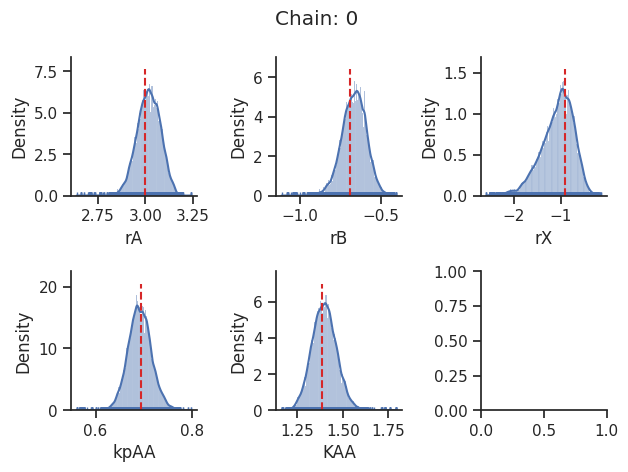

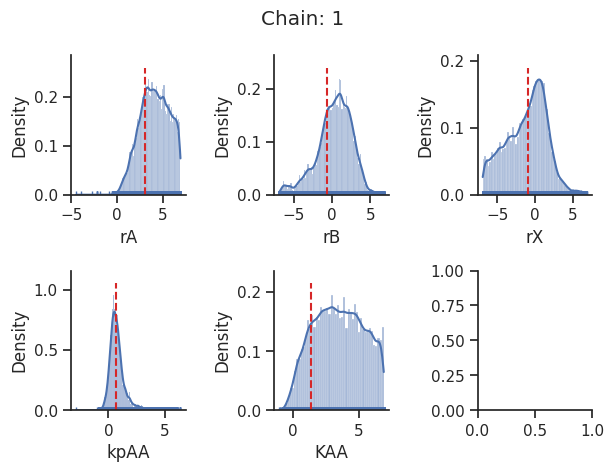

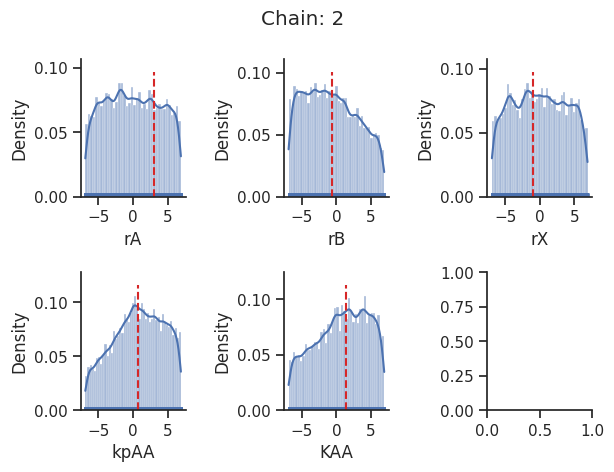

In [13]:
for i_chain in range(len(result.sample_result.betas)):
    ax = visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}"
    )
    
    y_max_00 = ax[0][0].get_ylim()[1]
    y_max_01 = ax[0][1].get_ylim()[1]
    y_max_02 = ax[0][2].get_ylim()[1]
    y_max_10 = ax[1][0].get_ylim()[1]
    y_max_11 = ax[1][1].get_ylim()[1]
    
    ax[0][0].vlines(np.log(rA_true), 0, y_max_00, color="tab:red", linestyle="--")
    ax[0][1].vlines(np.log(rB_true), 0, y_max_01, color="tab:red", linestyle="--")
    ax[0][2].vlines(np.log(rX_true), 0, y_max_02, color="tab:red", linestyle="--")
    ax[1][0].vlines(np.log(kpAA_true), 0, y_max_10, color="tab:red", linestyle="--")
    ax[1][1].vlines(np.log(KAA_true), 0, y_max_11, color="tab:red", linestyle="--")

In [14]:
# kAA, kAB, kAC
# kBA, kBB, kBC
# kCA, kCB, kCC


# rAA = kAA / kAA = 1
# rAB = kAA / kAB
# rAC = kAA / kAC

# rBA = kBB / kBA
# rBB = kBB / kBB = 1
# rBC = kBB / kBC

# rCA = kCC / kCA
# rCB = kCC / kCB
# rCC = kCC / kCC = 1


In [15]:
from pypesto.C import AMICI_STATUS, AMICI_T, AMICI_X, AMICI_Y
from pypesto.predict import AmiciPredictor


# This post_processor will transform the output of the simulation tool
# such that the output is compatible with the next steps.
def post_processor(amici_outputs, output_type, output_ids):
    outputs = [
        (
            amici_output[output_type]
            if amici_output[AMICI_STATUS] == 0
            else np.full((len(amici_output[AMICI_T]), len(output_ids)), np.nan)
        )
        for amici_output in amici_outputs
    ]
    return outputs


# Setup post-processors for both states and observables.
from functools import partial

amici_objective = result.problem.objective
state_ids = amici_objective.amici_model.getStateIds()
observable_ids = amici_objective.amici_model.getObservableIds()
post_processor_x = partial(
    post_processor,
    output_type=AMICI_X,
    output_ids=state_ids,
)
post_processor_y = partial(
    post_processor,
    output_type=AMICI_Y,
    output_ids=observable_ids,
)

# Create pyPESTO predictors for states and observables
predictor_x = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_x,
    output_ids=state_ids,
)
predictor_y = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_y,
    output_ids=observable_ids,
)

from pypesto.C import EnsembleType
from pypesto.ensemble import Ensemble

# corresponds to only the estimated parameters
x_names = result.problem.get_reduced_vector(result.problem.x_names)

# Create the ensemble with the MCMC chain from parallel tempering with the real temperature.
ensemble = Ensemble.from_sample(
    result,
    chain_slice=slice(
        None, None, 5
    ),  # Optional argument: only use every fifth vector in the chain.
    x_names=x_names,
    ensemble_type=EnsembleType.sample,
    lower_bound=result.problem.lb,
    upper_bound=result.problem.ub,
)

Engine will use up to 8 processes (= CPU count).
100%|█████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


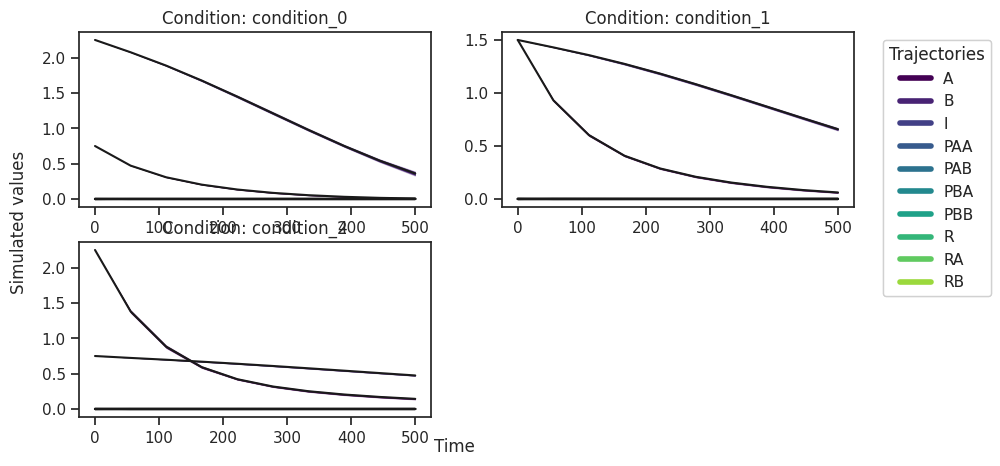

In [16]:
from pypesto.engine import MultiProcessEngine

engine = MultiProcessEngine()

ensemble_prediction = ensemble.predict(
    predictor_x, prediction_id=AMICI_X, engine=engine
)
from pypesto.C import CONDITION, OUTPUT

credibility_interval_levels = [90, 95, 99]

ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(10, 5),
    # labels={"A": "state_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=CONDITION,
    # condition_ids=["condition_0", "condition_1", "condition_2"],  # `None` for all conditions
    # output_ids=["A", "B"],  # `None` for all outputs
)

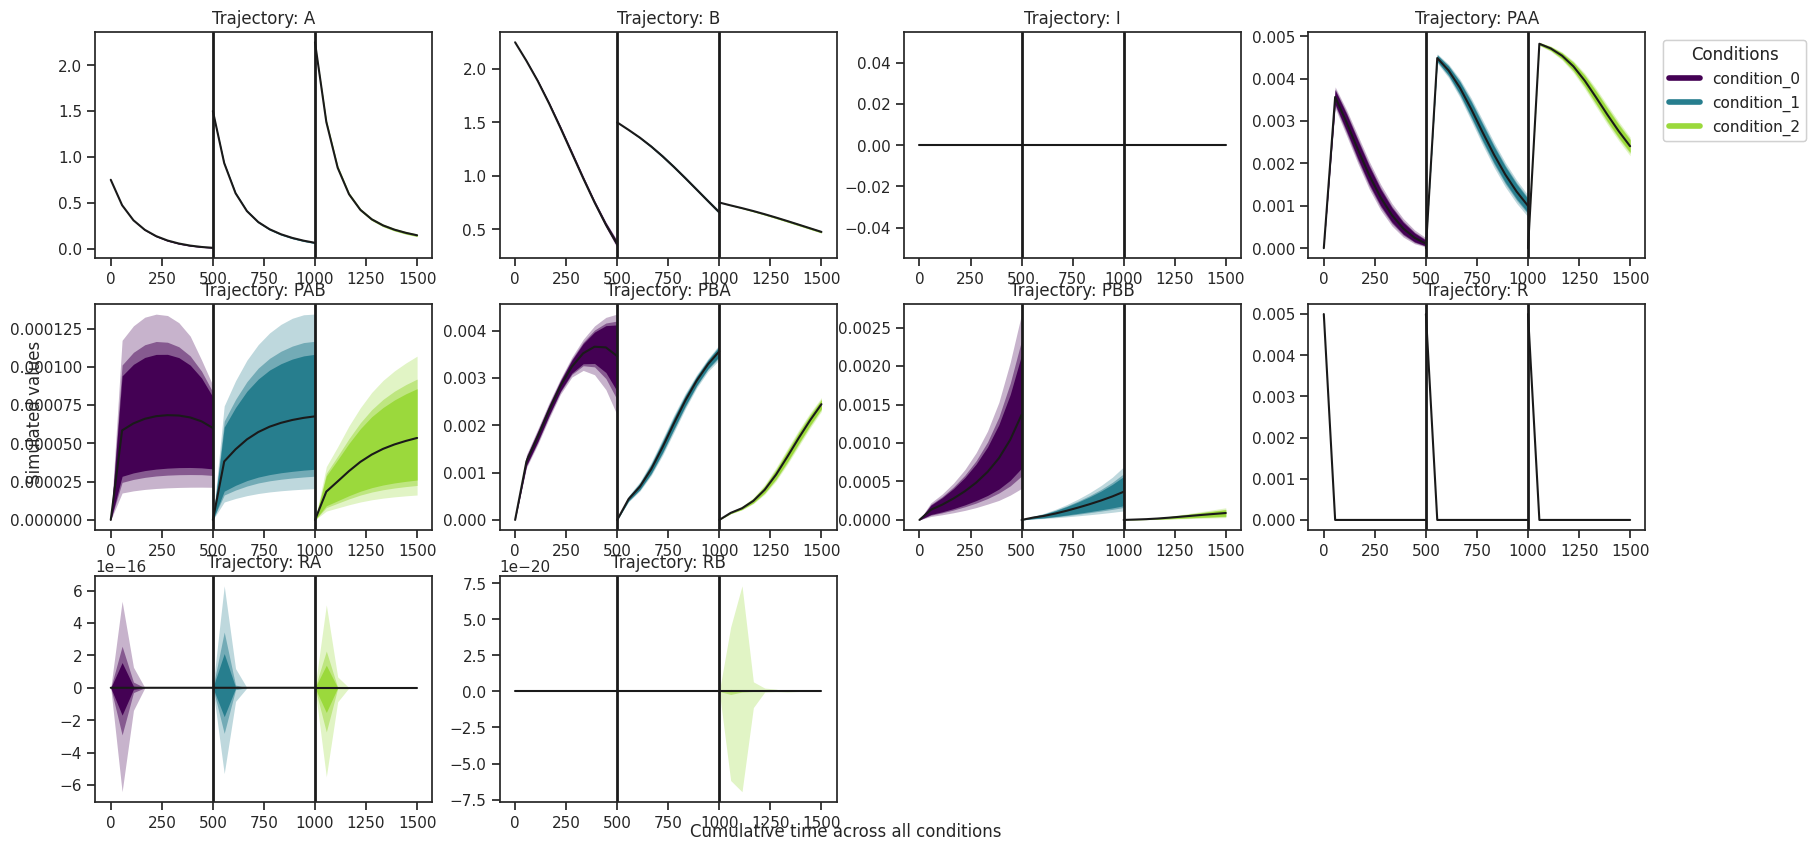

In [17]:
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(20, 10),
    # labels={"A": "obs_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=OUTPUT,
)

100%|█████████████████████████████████████████████| 8/8 [00:17<00:00,  2.23s/it]


AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

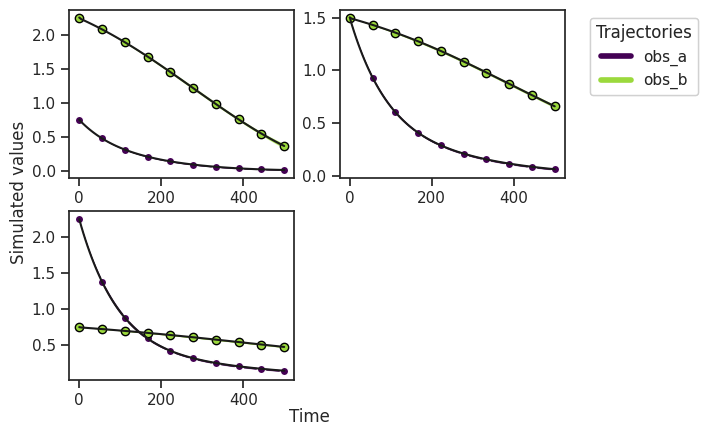

In [19]:

petab_problem = petab.Problem.from_yaml(
    yaml_filepath
)
mdf = petab_problem.measurement_df
# Create a custom objective with new output timepoints.
num_conditions=3
timepoints = [np.linspace(0, 500, 100) for i in range(num_conditions)]
amici_objective_custom = amici_objective.set_custom_timepoints(
    timepoints=timepoints
)

# Create an observable predictor with the custom objective.
predictor_y_custom = AmiciPredictor(
    amici_objective_custom,
    post_processor=post_processor_y,
    output_ids=observable_ids,
    condition_ids=[edata.id for edata in amici_objective_custom.edatas],
)

# Predict then plot.
ensemble_prediction = ensemble.predict(
    predictor_y_custom, prediction_id=AMICI_Y, engine=engine
)

ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    groupby=CONDITION,
    measurement_df=mdf,
    
)
import matplotlib.pyplot as plt
ax[0][0].set_title('')
ax[1][0].set_title('')
ax[0][1].set_title('')
ax[1][1].set_title('')
ax[0][0].set_ylim([-0.1, 2.1])
ax[1][0].set_ylim([-0.1, 2.1])
ax[0][1].set_ylim([-0.1, 2.1])
ax[1][1].set_ylim([-0.1, 2.1])

plt.show()

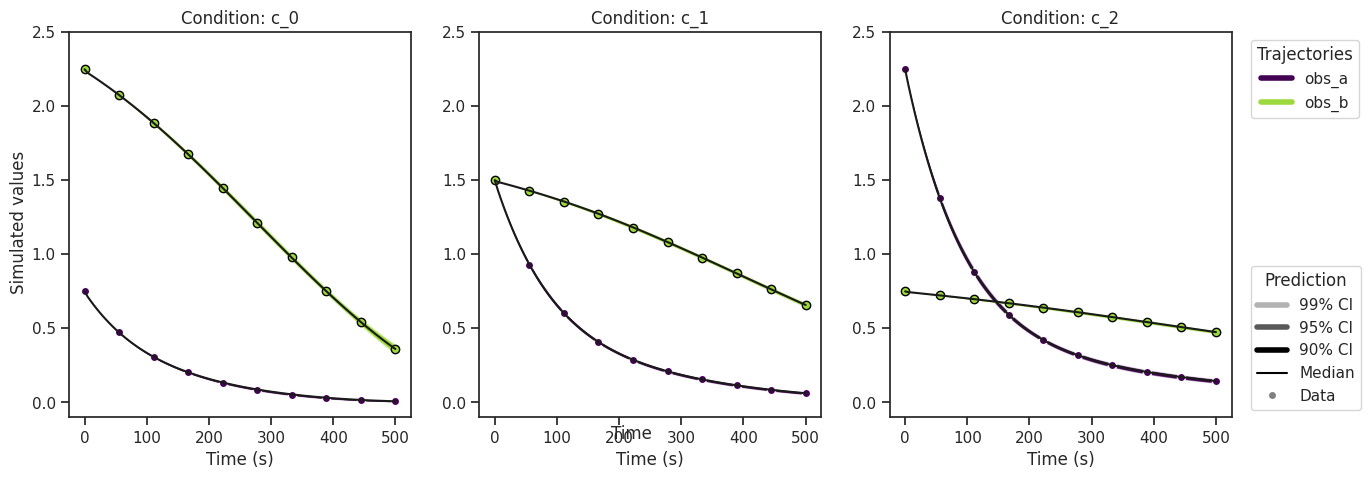

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    groupby=CONDITION,
    measurement_df=mdf,
    axes=ax,
)
# plt.tight_layout()

# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# ax[1][1].set_title('')
ax[0].set_ylim([-0.1, 2.5])
ax[1].set_ylim([-0.1, 2.5])
ax[2].set_ylim([-0.1, 2.5])
# fig.set_title('')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
ax[2].set_xlabel('Time (s)')
# ax[0].set_ylabel('Simulated Concentration (M)')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

plt.show()